## Ejercicio ML - Regresión - Precio Coches

En este ejercicio vamos a usar los datasets **`precio_coches_train.csv`** y **`precio_coches_test.csv`** que contiene los siguientes datos:

- **Precio**: float.
- **Combustible**: string.
- **Año**: int.
- **Km**: int.
- **CV**: int.
- **Provincia**: string.
- **Marca**: string.

El objetivo es entrenar un modelo de regresión que pueda predecir la columna de precio.

Para entrenar el modelo solo vamos a usar los datos de **`precio_coches_train.csv`**. Prueba con diferentes modelos y diferentes parámetros.

Después de tener el modelo entrenado vamos a hacer pruebas con **`precio_coches_test.csv`** y calcular las métricas para regresiones. Haz un DataFrame con estos resultados.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Modelos de Regresión
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

import math

# Métricas para Regresión
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [154]:
df_train = pd.read_csv("../Data/precio_coches_train.csv")
df_test = pd.read_csv("../Data/precio_coches_test.csv")

### **REPRESENTACIÓN DE DATOS**

<Axes: xlabel='Precio', ylabel='Count'>

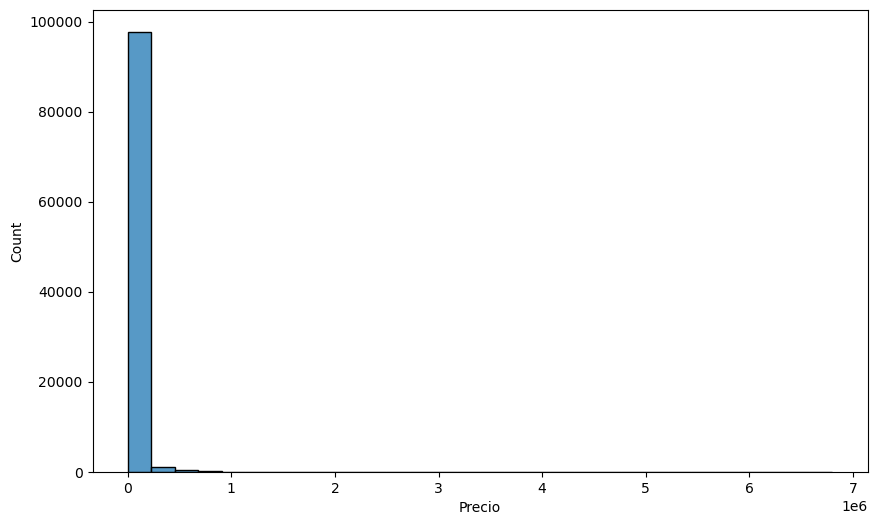

In [1324]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train["Precio"], bins = 30)

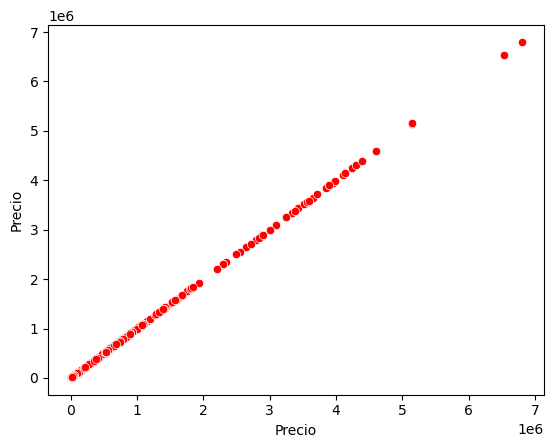

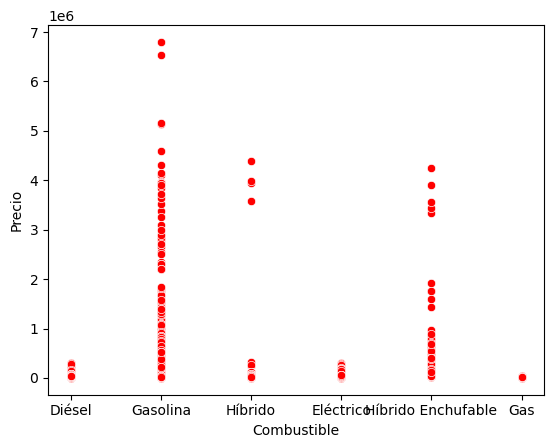

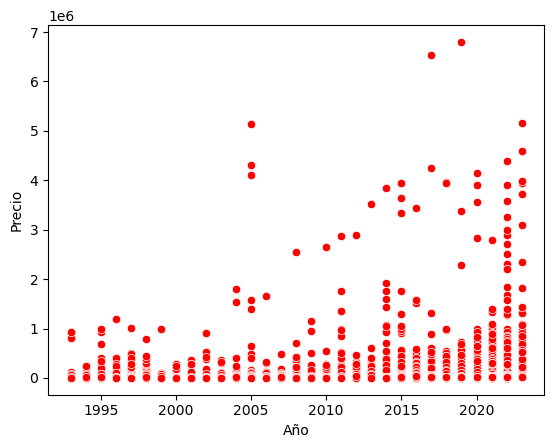

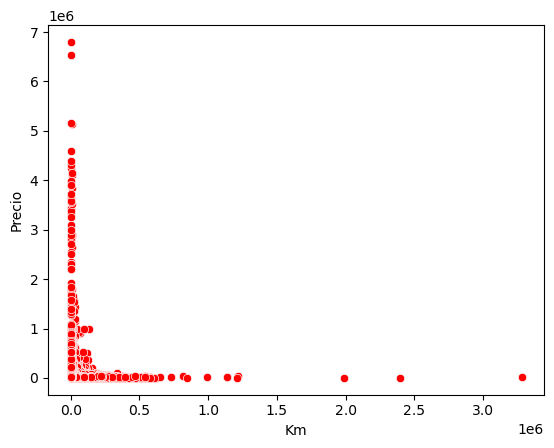

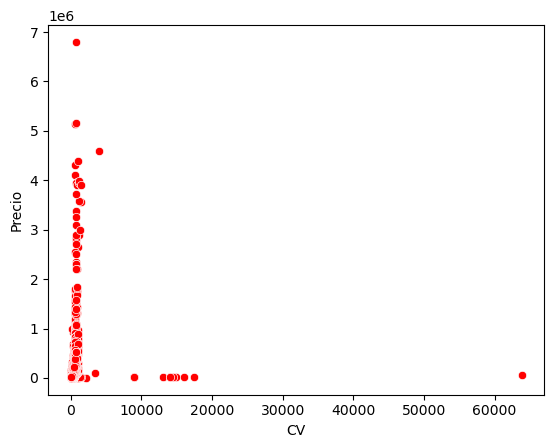

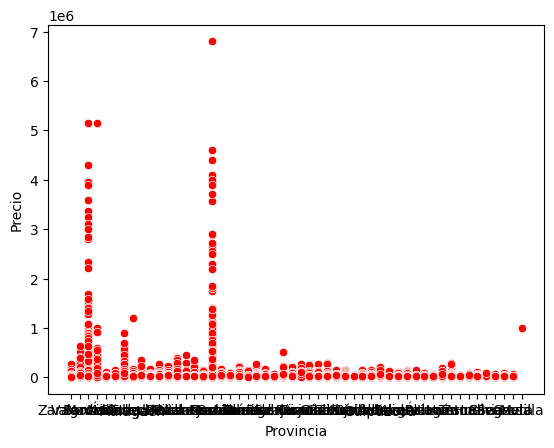

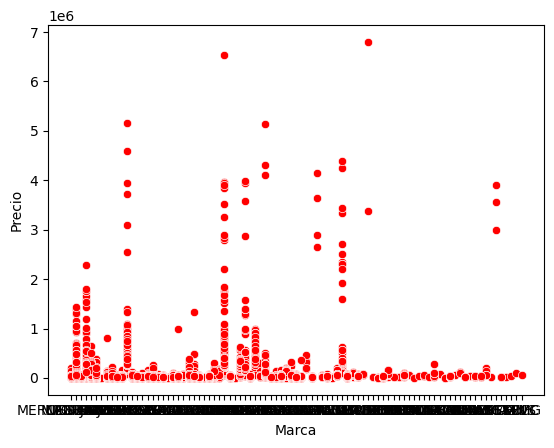

In [132]:
for col in df_train.columns:
    sns.scatterplot(x = df_train[col], y = df_train["Precio"], color = "r")
    plt.xticks(rotation=90)
    plt.show()

In [1268]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99304 entries, 0 to 99303
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Precio       99304 non-null  int64  
 1   Combustible  99304 non-null  object 
 2   Año          99304 non-null  int64  
 3   Km           99304 non-null  int64  
 4   CV           99044 non-null  float64
 5   Provincia    99044 non-null  object 
 6   Marca        99304 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


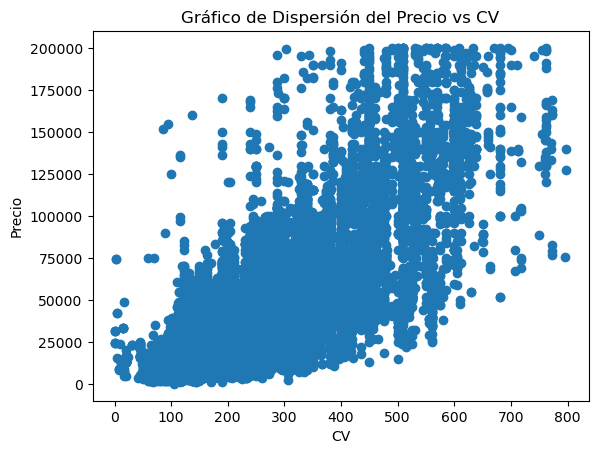

In [1456]:
df_filtrado = df_train.loc[df_train['CV'] <= 800]

# Crear un gráfico de dispersión
plt.scatter(df_filtrado['CV'], df_filtrado['Precio'])
plt.title('Gráfico de Dispersión del Precio vs CV')
plt.xlabel('CV')
plt.ylabel('Precio')
plt.show()

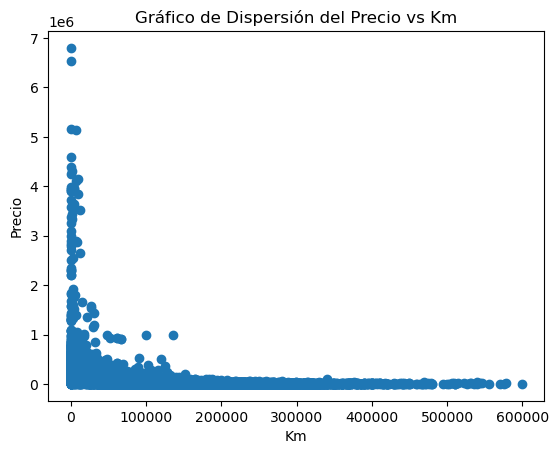

In [1385]:
df_filtrado = df_train.loc[df_train['Km'] <= 600000]

# Crear un gráfico de dispersión
plt.scatter(df_filtrado['Km'], df_filtrado['Precio'])
plt.title('Gráfico de Dispersión del Precio vs Km')
plt.xlabel('Km')
plt.ylabel('Precio')
plt.show()

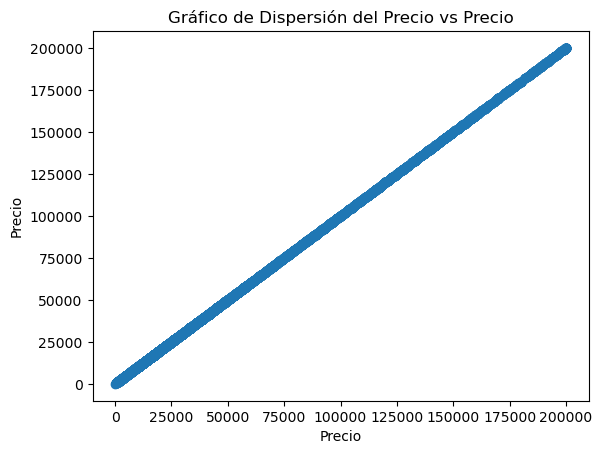

In [1234]:
df_filtrado = df_train.loc[df_train['Precio'] <= 200000]

# Crear un gráfico de dispersión
plt.scatter(df_filtrado['Precio'], df_filtrado['Precio'])
plt.title('Gráfico de Dispersión del Precio vs Precio')
plt.xlabel('Precio')
plt.ylabel('Precio')
plt.show()

In [1379]:
df_train.shape

(95521, 5)

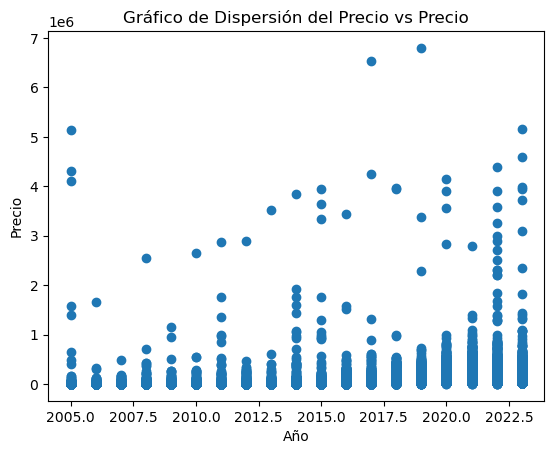

In [1387]:
df_filtrado = df_train.loc[df_train['Año'] >= 2005]

# Crear un gráfico de dispersión
plt.scatter(df_filtrado['Año'], df_filtrado['Precio'])
plt.title('Gráfico de Dispersión del Precio vs Precio')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()

In [155]:
upper_limit_cv = 800
upper_limit_precio = 200000
upper_limit_km = 600000
downper_limit_año = 2005

df_train = df_train[(df_train['CV'] <= upper_limit_cv) & (df_train['Precio'] <= upper_limit_precio) & (df_train['Km'] <= upper_limit_km) & (df_train['Año'] >= downper_limit_año)]

In [156]:
df_train['Usado'] = (df_train['Km'] > 15000).astype(int)
df_test['Usado'] = (df_test['Km'] > 15000).astype(int)

In [157]:
df_train.shape

(95521, 8)

### **OBJETOS PARA ENTRENAMIENTO**

In [158]:
# Inicializamos un objeto LabelEncoder()
combustible_labelEncoding = LabelEncoder()
# Inicializamos un objeto LabelEncoder()
marca_labelEncoding = LabelEncoder()
# Inicializamos un objeto LabelEncoder()
provincia_labelEncoding = LabelEncoder()

### **PROCESAMIENTO DE DATOS**

**CV_TRAIN**

In [159]:
df_CV = pd.DataFrame(df_train['CV'])

# Reemplaza los NaN's de la columna "CV" o cualquier columna que tenga nulos por la media de CV o de la columna que le corresponde de los k-vecinos mas cercanos (KNN).        
imputer = KNNImputer(n_neighbors = 3) #inicializa el modelo predictivo
# perfila cada fila y a cada uno que le falta el valor lo rellena con la media de los 3 mas cercanos que se asemejen a el                                
columna_cv = imputer.fit_transform(df_CV) #entrenamos el modelo y aplicamos las transformaciones al df
df_CV["CV"] = columna_cv
df_train["CV"] = df_CV["CV"]
# El resultado de utilizar el KNNImputer es un array.
# Esto quiere decir que se pierde el formato de DataFrame, por lo tanto perdemos el nombre de las columnas.
# En este ejemplo llena cada NaN's por la media de las CV de los k-vecinos más cercanos.

**COMBUSTIBLE DF_TRAIN**

In [160]:
# Lo "entrenamos" con los datos de la columna
combustible_labelEncoding.fit(df_train["Combustible"].values)

# Transformamos la columna
combustible = combustible_labelEncoding.transform(df_train["Combustible"].values)

df_train["Combustible"] = combustible

**COMBUSTIBLE DF_TEST**

In [161]:
# Lo "entrenamos" con los datos de la columna, con el mismo objeto de antes
combustible_labelEncoding.fit(df_test["Combustible"].values)

# Transformamos la columna
combustible = combustible_labelEncoding.transform(df_test["Combustible"].values)

df_test["Combustible"] = combustible

**MARCA DF_TRAIN**

In [162]:
# Lo "entrenamos" con los datos de la columna
marca_labelEncoding.fit(df_train["Marca"].values)

# Transformamos la columna
marca = marca_labelEncoding.transform(df_train["Marca"].values)

df_train["Marca"] = marca

**MARCA DF_TEST**

In [163]:
# Lo "entrenamos" con los datos de la columna
marca_labelEncoding.fit(df_test["Marca"].values)

# Transformamos la columna
marca = marca_labelEncoding.transform(df_test["Marca"].values)

df_test["Marca"] = marca

**PROVINCIA DF_TRAIN**

In [164]:
df_train["Provincia"] = df_train["Provincia"].fillna(df_train["Provincia"].mode()[0])

# Lo "entrenamos" con los datos de la columna
provincia_labelEncoding.fit(df_train["Provincia"].values)

# Transformamos la columna
provincia = provincia_labelEncoding.transform(df_train["Provincia"].values)

df_train["Provincia"] = provincia

**PROVINCIA DF_TEST**

In [165]:
# Lo "entrenamos" con los datos de la columna
provincia_labelEncoding.fit(df_test["Provincia"].values)

# Transformamos la columna
provincia = provincia_labelEncoding.transform(df_test["Provincia"].values)

df_test["Provincia"] = provincia

### **CORRELACIONES:**

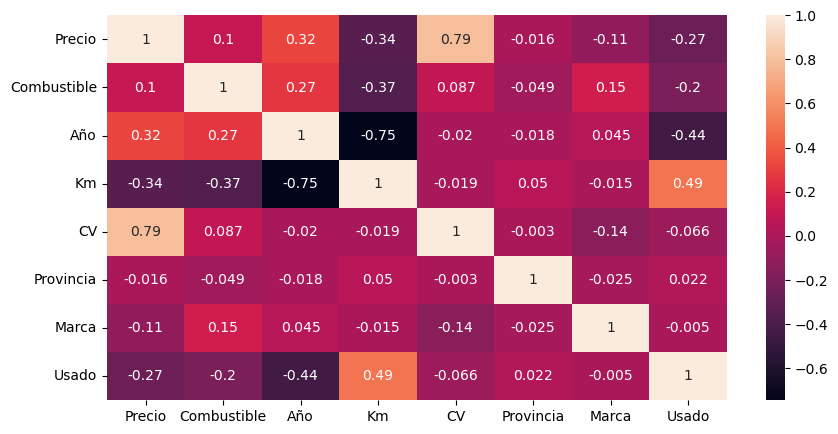

In [166]:
plt.figure(figsize = (10, 5))
sns.heatmap(data = df_train.corr(), annot = True)
plt.show()

In [167]:
df_train = df_train.drop("Provincia", axis=1)
df_test = df_test.drop("Provincia", axis=1)

### **-------------------------------------------------------------------------------------------------------------------**

### **PARA MEJOR PREDICCIÓN EJECUTAR LA SIGUIENTE CELDA**

In [168]:
df_train = df_train.drop("Marca", axis=1)
df_test = df_test.drop("Marca", axis=1)
df_train = df_train.drop("Combustible", axis=1)
df_test = df_test.drop("Combustible", axis=1)

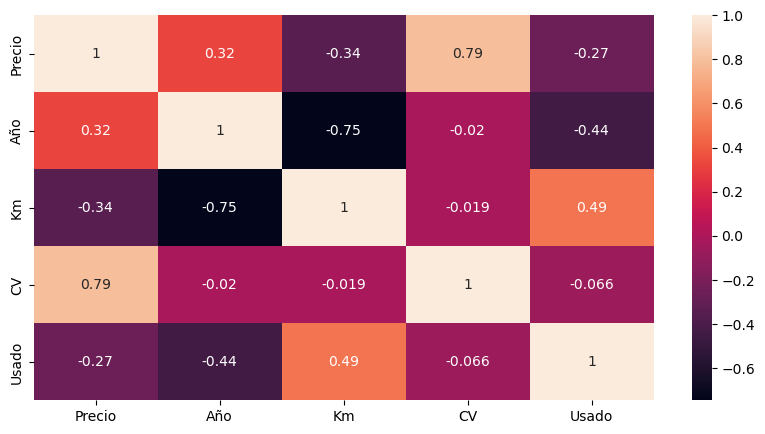

In [169]:
plt.figure(figsize = (10, 5))
sns.heatmap(data = df_train.corr(), annot = True)
plt.show()

### **ENTRENAMIENTO REGRESIÓN LINEAL MÚLTIPLE:**

In [179]:
X_train = np.array(df_train.drop("Precio", axis=1))

y_train = np.array(df_train["Precio"])

X_test = np.array(df_test.drop("Precio", axis=1))

y_test = np.array(df_test["Precio"])

regresion_lineal = LinearRegression()
regresion_lineal2 = KNeighborsRegressor(n_neighbors=1)
#regresion_lineal = RadiusNeighborsRegressor(radius=df_train["Precio"].mean()*2) #MALISIMO
regresion_lineal.fit(X_train, y_train)
regresion_lineal2.fit(X_train, y_train)
# Encontramos los coeficientes de la recta  
#print ("weights:", regresion_lineal.coef_)
#print ("w_0:", regresion_lineal.intercept_)

KNeighborsRegressor(n_neighbors=1)

### **PREDICCIONES Y MÉTRICAS:**

In [180]:
yhat = regresion_lineal.predict(X_test)
yhat2 = regresion_lineal2.predict(X_test)

# Relative Absolute Error
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
# Adjusted R**2

r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

print(f"MAE:\t {mean_absolute_error(y_test, yhat)}")
print(f"MSE:\t {mean_squared_error(y_test, yhat)}")
print(f"RMSE:\t {math.sqrt(mean_squared_error(y_test, yhat))}")
print(f"R**2:\t {r2_score(y_test, yhat)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

# Relative Absolute Error
RAE2 = np.sum(np.abs(np.subtract(y_test, yhat2))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
# Relative Square Error
RSE2 = np.sum(np.square(np.subtract(y_test, yhat2))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
# Adjusted R**2

r2_ajustada2 = 1 - (1 - regresion_lineal2.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

for i, j in zip(yhat2[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

print(f"MAE:\t {mean_absolute_error(y_test, yhat2)}")
print(f"MSE:\t {mean_squared_error(y_test, yhat2)}")
print(f"RMSE:\t {math.sqrt(mean_squared_error(y_test, yhat2))}")
print(f"R**2:\t {r2_score(y_test, yhat2)}")
print(f"RAE:\t {RAE2}")
print(f"RSE:\t {RSE2}")
print(f"Adjusted R**2:\t {r2_ajustada2}")

Predicción:115222.01756420825 	Valor real:139900
Predicción:38902.14477320574 	Valor real:49900
Predicción:24150.9025416472 	Valor real:27250
Predicción:-806.4017629991286 	Valor real:6900
Predicción:26015.819469825365 	Valor real:27495
MAE:	 5042.555824492908
MSE:	 77407504.36856529
RMSE:	 8798.153463572075
R**2:	 0.7573265366600691
RAE:	 0.47592446721967063
RSE:	 0.24267346333993092
Adjusted R**2:	 0.7560691612023492
Predicción:139900.0 	Valor real:139900
Predicción:34900.0 	Valor real:49900
Predicción:27250.0 	Valor real:27250
Predicción:4499.0 	Valor real:6900
Predicción:33900.0 	Valor real:27495
MAE:	 1633.5431145431146
MSE:	 27538379.12097812
RMSE:	 5247.702270611217
R**2:	 0.9136668480586017
RAE:	 0.15417640647488018
RSE:	 0.08633315194139835
Adjusted R**2:	 0.9132195260278172


### **NORMALIZACIÓN DE DATOS**

In [181]:
X_train = df_train.drop("Precio", axis=1)
y_train = df_train["Precio"].values
X_test = df_test.drop("Precio", axis=1)
y_test = df_test["Precio"].values

# Normalizacion de X_train
scaler_x = MinMaxScaler()
scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)

# Normalizacion de y_train
scaler_y = MinMaxScaler()
scaler_y.fit(y_train.reshape(-1, 1)) # .reshape(-1, 1) se utiliza para transformar un vector a una matriz
y_train = scaler_y.transform(y_train.reshape(-1,1))

# Normalizacion de X_test
#scaler_x.fit(X_test)
X_test = scaler_x.transform(X_test)

# Normalizacion de y_test
#scaler_y.fit(y_test.reshape(-1, 1)) # .reshape(-1, 1) se utiliza para transformar un vector a una matriz
y_test = scaler_y.transform(y_test.reshape(-1,1))

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")

Conjunto de Train: ((95521, 4), (95521, 1))
Conjunto de Test: ((777, 4), (777, 1))


### **MODELO REGRESIÓN LINEAL MULTIPLE:**

In [182]:
regresion_lineal3 = LinearRegression()
#regresion_lineal = KNeighborsRegressor(n_neighbors=1)
#regresion_lineal = RadiusNeighborsRegressor(radius=df_train["Precio"].mean()*2) #MALISIMO

regresion_lineal3.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ("weights:", regresion_lineal3.coef_)
print ("w_0:", regresion_lineal3.intercept_)

weights: [[ 0.09987938 -0.15768541  0.76597424 -0.01392951]]
w_0: [-0.05959468]


### **PREDICCIONES**

In [183]:
yhat = regresion_lineal3.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

Predicción:[0.76524167] 	Valor real:[0.69727548]
Predicción:[0.19633109] 	Valor real:[0.2431887]
Predicción:[0.09223419] 	Valor real:[0.12891019]
Predicción:[-0.04499642] 	Valor real:[0.02623613]
Predicción:[0.10179061] 	Valor real:[0.13014632]


### **MÉTRICAS**

In [184]:
yhat_natural = scaler_y.inverse_transform(yhat)
ytest_natural = scaler_y.inverse_transform(y_test)

RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
# Relative Square Error
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
# Adjusted R**2
r2_ajustada = 1 - (1 - regresion_lineal3.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

print(f"MAE:\t {mean_absolute_error(y_test, yhat)} Los precios se desvian {(mean_absolute_error(y_test, yhat) / np.mean(y_test))*100} % (magnitud del error en términos porcentuales en relación con la media de los valores reales)")
print(f"MSE:\t {mean_squared_error(y_test, yhat)} Los precios se desvian {(mean_squared_error(y_test, yhat) / np.mean(y_test))*100} % (magnitud del error cuadrático medio en términos porcentuales en relación con la media de los valores reales)")
print(f"RMSE:\t {math.sqrt(mean_squared_error(y_test, yhat))} Los precios se están desviando un {math.sqrt(mean_squared_error(y_test, yhat))*100} % (tiene la misma escala que la variable objetivo, por lo que a menudo se prefiere para la interpretación de errores en modelos de regresión)")
print(f"R**2:\t {1-RSE} o {(1-RSE)*100} % (proporción de variabilidad explicada)")
print(f"RAE:\t {RAE} las predicciones del modelo están desviándose en aproximadamente un {RAE*100} Cuanto más bajo sea el RAE, mejor será el rendimiento del modelo en términos relativos.")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada} o {(r2_ajustada)*100} %")

MAE:	 0.03821318121437181
MSE:	 0.0031781530965727302
RMSE:	 0.05637511061250994
R**2:	 0.6085995355959835
RAE:	 0.7148322892722396
RSE:	 0.3914004644040166
Adjusted R**2:	 0.6065715539151336


### **PRUEBA MILANUNCIOS**

In [193]:
data = {"Marca": ["MERCEDEZ-BENZ"],
        "Año": [2023],
        "Km": [10],
        "CV": [150],
        "Combustible": ["Diésel"]}

df_prueba = pd.DataFrame(data)

combustible_labelEncoding.fit(df_prueba["Combustible"].values)

# Transformamos la columna
combustible = combustible_labelEncoding.transform(df_prueba["Combustible"].values)

df_prueba["Combustible"] = combustible

# Lo "entrenamos" con los datos de la columna
marca_labelEncoding.fit(df_prueba["Marca"].values)

# Transformamos la columna
marca = marca_labelEncoding.transform(df_prueba["Marca"].values)

df_prueba["Marca"] = marca

df_prueba['Usado'] = (df_prueba['Km'] > 15000).astype(int)

df_prueba = df_prueba.drop("Marca", axis=1)
df_prueba = df_prueba.drop("Combustible", axis=1)

X_test_prueba = np.array(df_prueba)

yhat_prueba = regresion_lineal.predict(X_test_prueba)
yhat2_prueba = regresion_lineal2.predict(X_test_prueba)
yhat3_prueba = regresion_lineal3.predict(X_test_prueba)

print(f"""      Usando el modelo KNeighborsRegressor sin normalizar datos: {yhat2_prueba[0]},
      Usando el modelo LinearRegression sin normalizar datos: {yhat_prueba[0]},
      Usando el modelo LinearRegression normalizando datos: {yhat3_prueba[0][0]}""")

      Usando el modelo KNeighborsRegressor sin normalizar datos: 43900.0,
      Usando el modelo LinearRegression sin normalizar datos: 36731.31285229558,
      Usando el modelo LinearRegression normalizando datos: 315.3156681294967
